In [1]:
import urllib

query = "'trade war'"
query = urllib.parse.quote_plus(query) # Format into URL encoding
number_result = 20

In [5]:
pip install pyyaml ua-parser user-agents fake-useragentZ
pip install -U textblob
pip install --user -U nltk
pip install wordcloud

  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434676 sha256=44d6e9fe7d887fe95de535ad03974e12fe4c100c071c7fde540a9ff93074c87d
  Stored in directory: c:\users\mohan\appdata\local\pip\cache\wheels\45\6c\46\a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
# ALl the imports
import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import re, string, unicodedata
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Code using BeautifulSoup package to import HTML content of the web page
def get_page_content(web_url):
    context = ssl.create_default_context()
    context.check_hostname = False
    context.verify_mode = ssl.CERT_NONE
    content = urllib.request.urlopen(web_url, context=context).read()
    b_soup = BeautifulSoup(content, 'html.parser')
    return(b_soup)
    

In [3]:
#Code to define stop words to be used in word cloud creation
def get_stopwords():
    # Create stopword list:
    stop_words = set(stopwords.words('english'))
    #print(stop_words)
    stopwords1 = set(STOPWORDS)
    stopwords1.update(["drink", "now", "wine", "flavor", "flavors"])
    stopwords1.update(stop_words)
    return(stopwords1)

In [4]:
# COde to get the expert reviews from the URLs
def get_expert_review(expert_url, category):
    soup = get_page_content(expert_url)
    
    page = soup.find_all('a', attrs = {'class': 'pagination-numerical-list-item-link'})
    pnum = re.findall(r'>(.+?)</a>',str(page))
    if len(pnum) == 0:
        maxpnum = 1
    else:
        maxpnum = max(pnum)
    
    print(maxpnum)
    full_review = ''
    for i in range(int(maxpnum)):
        soup = get_page_content(expert_url+'/'+str(i+1))
        web_display = soup.find_all('p')
        review_paragraphs = []
        for x in web_display:
            review_paragraphs.append(str(x))
        filtered_content = [i for i in review_paragraphs if i.startswith('<p>')]
        filtered_content = ' '.join([str(elem) for elem in filtered_content])

        final_content = re.sub(r'<a(.+?)</a>',' ',filtered_content)
        final_content = final_content.replace('<a>', ' ').replace('</a>', ' ').replace('<p>', ' ').replace('</p>', ' ')
        full_review = full_review + final_content
        
    return(full_review)
    
    

In [5]:
#Code to get the amazon reviews
def get_amazon_review(amazon_url, category):
    # This block of code will help extract the long reviews of the product
    review = ''
    for i in range(5):
        soup = get_page_content(amazon_url+"/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=" + str(i+1))
        for divs in soup.findAll('span', attrs={'data-hook': 'review-body'}):
            long_review = divs.text.strip()
            #product_json['long-reviews'].append(long_review)
            review = review + ', ' + long_review
    review_list = review.split(",")
    return(review_list)


In [6]:
#Code to clean the data before word cloud creation
def clean_data(input_str):
    lemmatizer=WordNetLemmatizer()
    
    input_str=str(input_str)
    input_str=word_tokenize(input_str)
    out_str = ''
    for word in input_str:
        word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        word = word.lower()
        word = re.sub(r'[^\w\s]', '', word)
        out_str = out_str + ' ' +lemmatizer.lemmatize(word)
    return(out_str)

In [7]:
expert_url = input("Enter Expert Review Url- ")##"https://www.techradar.com/in/reviews/canon-eos-6d-mark-ii-review"
expert_review_list = get_expert_review(expert_url, 'Camera')

blob = TextBlob(expert_review_list)
print(blob.sentiment)
print('#######################################')
expert_product_review = []
expert_product_sentiment = []
for sentence in blob.sentences:
    expert_product_review.append(sentence)
    expert_product_sentiment.append(sentence.sentiment.polarity)
#print(product_sentiment)
    
blob1 = blob

Enter Expert Review Url- https://www.techradar.com/in/reviews/canon-eos-6d-mark-ii-review
4
Sentiment(polarity=0.18217978941816143, subjectivity=0.4893820897018571)
#######################################


(0.0, 40.0)

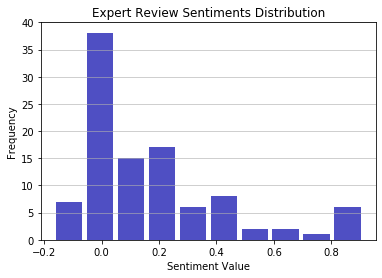

In [8]:
## Frequency Distribution of Sentiment Values
n, bins, patches = plt.hist(x=expert_product_sentiment, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')
plt.title('Expert Review Sentiments Distribution')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

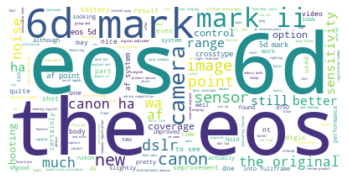

In [9]:
#Word Cloud for Expert Reviews
blob = blob1
#print ("There are {} words in the combination of all review.".format(len(text)))

stopwords_list = get_stopwords()

text = clean_data(str(blob1))##expert_review_list##" ".join(review for review in df.description)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords_list, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [10]:
amazon_url = input("Enter Amazon Product Url- ")##"https://www.amazon.in/Canon-EOS-6D-Mark-II/product-reviews/B0749MNH83"
amazon_review_list = get_amazon_review(amazon_url, 'Camera')

consolidated_review = ''
amazon_product_review = []
amazon_product_sentiment = []
for review in amazon_review_list:
    blob = TextBlob(review)
    consolidated_review = consolidated_review + review
    amazon_product_review.append(review)
    amazon_product_sentiment.append(blob.sentiment.polarity)
    #print(blob.sentiment.polarity)
print('####################')
blob = TextBlob(consolidated_review)
blob.sentiment.polarity

Enter Amazon Product Url- https://www.amazon.in/Canon-EOS-6D-Mark-II/product-reviews/B0749MNH83
####################


0.2196691644937259

(0.0, 40.0)

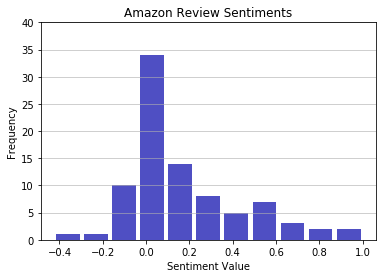

In [11]:
## Frequency Distribution of Sentiment Values
n, bins, patches = plt.hist(x=amazon_product_sentiment, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')
plt.title('Amazon Review Sentiments')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

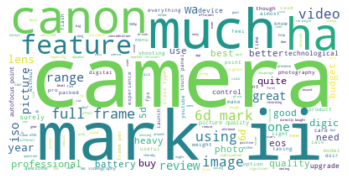

In [12]:
#Word Cloud creation for amazon reviews
blob1 = consolidated_review
##print ("There are {} words in the combination of all review.".format(len(blob1)))

##print (blob1)

stopwords_list = get_stopwords()

text = clean_data(str(blob1))##expert_review_list##" ".join(review for review in df.description)
##print(text)
# Generate a word cloud image
##print ("There are {} words in the combination of all review.".format(len(text)))
wordcloud = WordCloud(stopwords=stopwords_list, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
